In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def plot_digit(x, index):
    image = x[index].reshape(16,16)

    plt.imshow(image, 'binary')
    plt.axis('off')
    plt.show()

In [16]:
def sign(x):
    if x<0:
        return -1.0
    else:
        return 1.0

In [34]:
def dot_product_kernel(p, q, d):
    return (np.dot(p, q.T)**d)

In [18]:
def get_data(data_path):
    data = np.loadtxt(data_path)
    
    X = data[:, list(range(1, data.shape[1]))] 
    y = data[:, [0]]
    
    return X, y

In [363]:
def make_kernel(X1, X2, d):

    m1, n1 = X1.shape
    m2, n2 = X2.shape
    
    kernel_matrix = np.zeros((m1, m2))

    for i in range(m1):
        for j in range(m2):
            kernel_matrix[i][j] = dot_product_kernel(X1[i], X2[j], d)
    
    return kernel_matrix.T 

In [217]:
def prediction(kernel_matrix, alpha, t):
    
    kernel_function = alpha*kernel_matrix[t]
    y_pred = np.sum(kernel_function, axis=1)
    number_predicted = np.argmax(y_pred)
    
    return (number_predicted)

In [244]:
def update_alpha(alpha, t, y_hat_index, y_index):
    
    alpha[y_hat_index][t] = alpha[y_hat_index][t] - 1
    alpha[y_index][t] = alpha[y_index][t] + 1
    return alpha

In [268]:
#Get data
x_train, y_train = get_data("dtrain123.dat")
x_test, y_test = get_data("dtest123.dat")
m, n = x_train.shape

In [379]:
#Form data kernel
d = 1
kernel_matrix = make_kernel(x_train, x_train, d)
#Number of classes
k = 3
#Initialisations
alpha = np.zeros((k, m))

In [386]:
num_correct = 0
for t in range(m):
    y_hat = prediction(kernel_matrix, alpha, t)
    
    y_train_index = int(y_train[t]-1)
    if y_hat == y_train_index:
        num_correct = num_correct + 1
    else:
        alpha = update_alpha(alpha, t, y_hat, y_train_index)
        
print("Fraction correct: ", num_correct/m)

Fraction correct:  1.0


In [368]:
alpha[:, 0:5]

array([[-1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.]])

In [377]:
m_test, n_test = x_test.shape

In [370]:
test_kernel_matrix = make_kernel(x_train, x_test, d)

In [376]:
test_kernel_matrix[:,0].shape

(456,)

In [388]:
num_correct = 0
for t in range(m_test):
    y_hat = prediction(test_kernel_matrix, alpha, t)
    
    y_train_index = int(y_test[t]-1)
    if y_hat == y_train_index:
        num_correct = num_correct + 1
        
print("Fraction correct: ", num_correct/m_test)

Fraction correct:  0.9517543859649122


In [395]:
y_test[30]

array([3.])

In [396]:
prediction(test_kernel_matrix, alpha, 30)

2

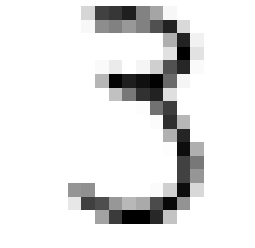

In [28]:
plot_digit(x_train, 11)